In [1]:
%matplotlib inline
from context import spew
from scipy.optimize import curve_fit, minimize
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import ScalarFormatter, FormatStrFormatter
import scipy.ndimage
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rc
from mpl_toolkits.mplot3d import axes3d
from matplotlib import colors as mcolors
from matplotlib.collections import PolyCollection
import pandas as pd
import scipy.stats as stats
plt.style.use('ggplot')
rc('font', **{'family': 'serif', 'serif': ['Palatino']})
rc('text', usetex=True)

In [2]:
param = "plume_height"
label = "H"
units = "km"
trial = 10
vals = np.linspace(10000, 40000, 21)

vals = [int(val) for val in vals]

def disp_func(col):
    return col / 1000

eruptions = dict()
samples_df = dict()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


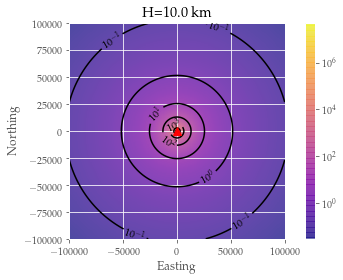

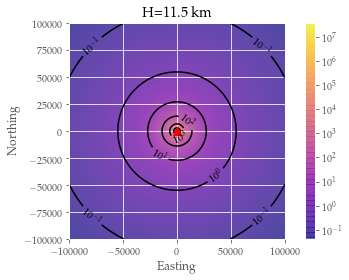

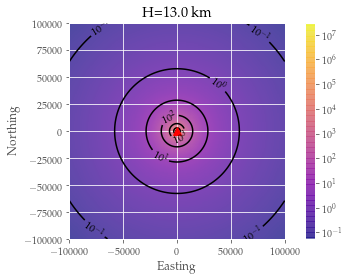

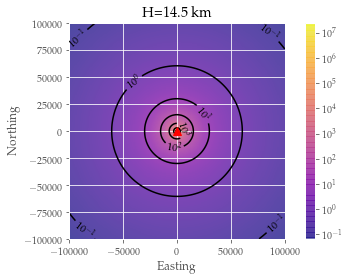

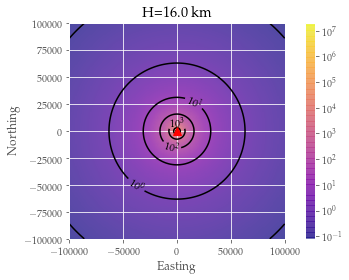

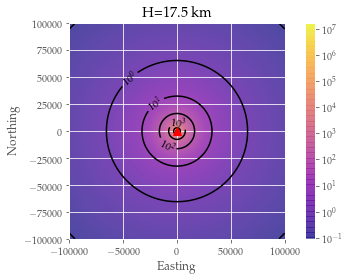

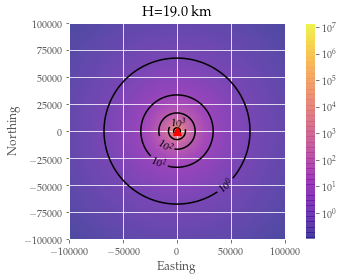

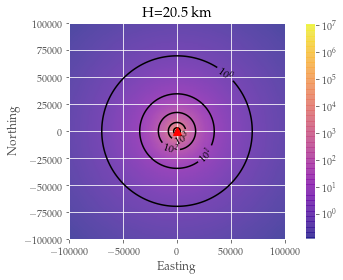

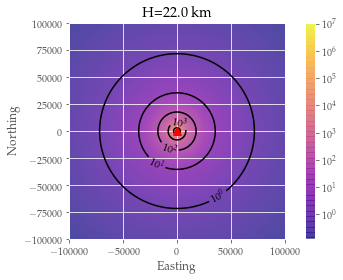

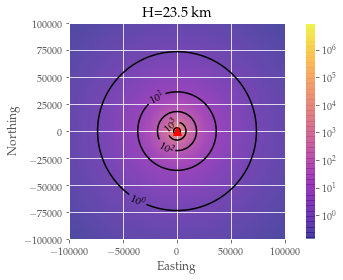

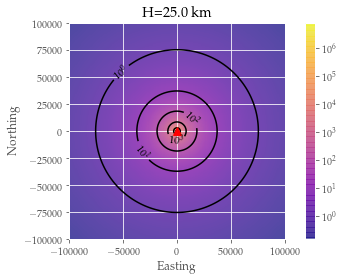

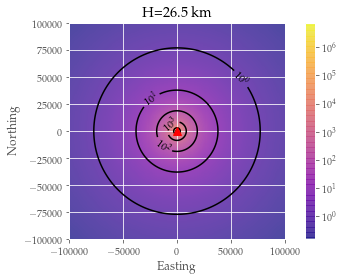

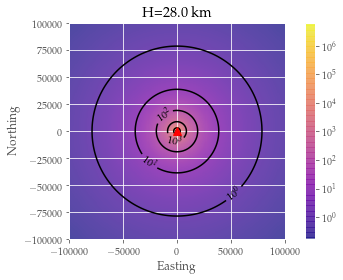

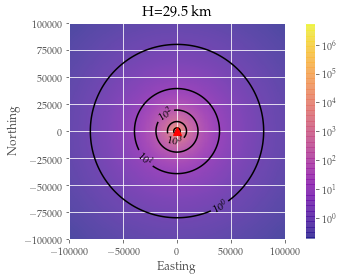

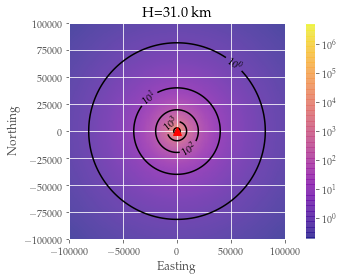

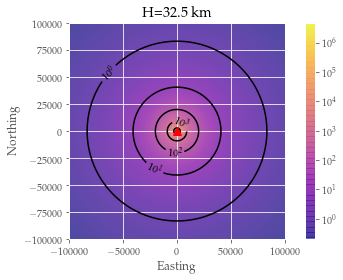

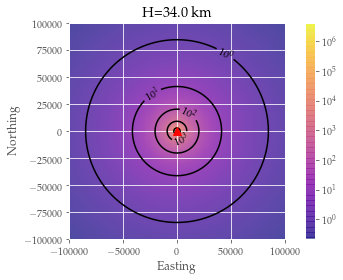

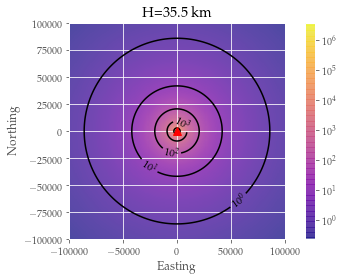

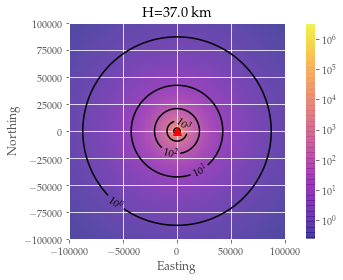

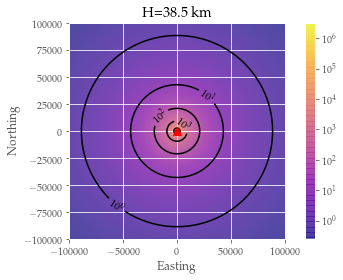

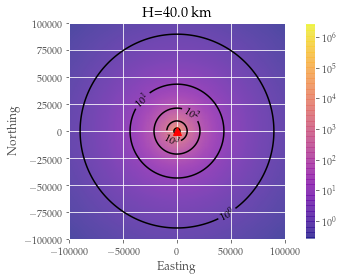

In [3]:
for v in vals:
    filename = '../../data/%s_trial_%d/%s_trial_%d.txt' % (
        param, trial, param, v)
    eruptions[v] = spew.core.eruption.Eruption(data=filename, vent=Point(0, 0), test=False)
    fig, ax = eruptions[v].plot_contour(background='gradient', cmap="plasma", 
                                        line_colors="k", title="H=%s km"%disp_func(v))
#     eruptions[v].df = eruptions[v].sample(50, alpha=0.7)
#     eruptions[v].df.plot(ax=ax, c='c', marker='.', edgecolor="k")
phis = eruptions[vals[0]].phi_labels
rows = int(len(phis) / 2)

In [312]:
H_arr = [16000, 25000, 34000]
phi_arr = ['[-3.64286,-3.21429)', '[-0.214286,0.214286)', '[3.21429,3.64286)']
print(phis)

['[-4.5,-4.07143)', '[-4.07143,-3.64286)', '[-3.64286,-3.21429)', '[-3.21429,-2.78571)', '[-2.78571,-2.35714)', '[-2.35714,-1.92857)', '[-1.92857,-1.5)', '[-1.5,-1.07143)', '[-1.07143,-0.642857)', '[-0.642857,-0.214286)', '[-0.214286,0.214286)', '[0.214286,0.642857)', '[0.642857,1.07143)', '[1.07143,1.5)', '[1.5,1.92857)', '[1.92857,2.35714)', '[2.35714,2.78571)', '[2.78571,3.21429)', '[3.21429,3.64286)', '[3.64286,4.07143)', '[4.07143,4.5)']


c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


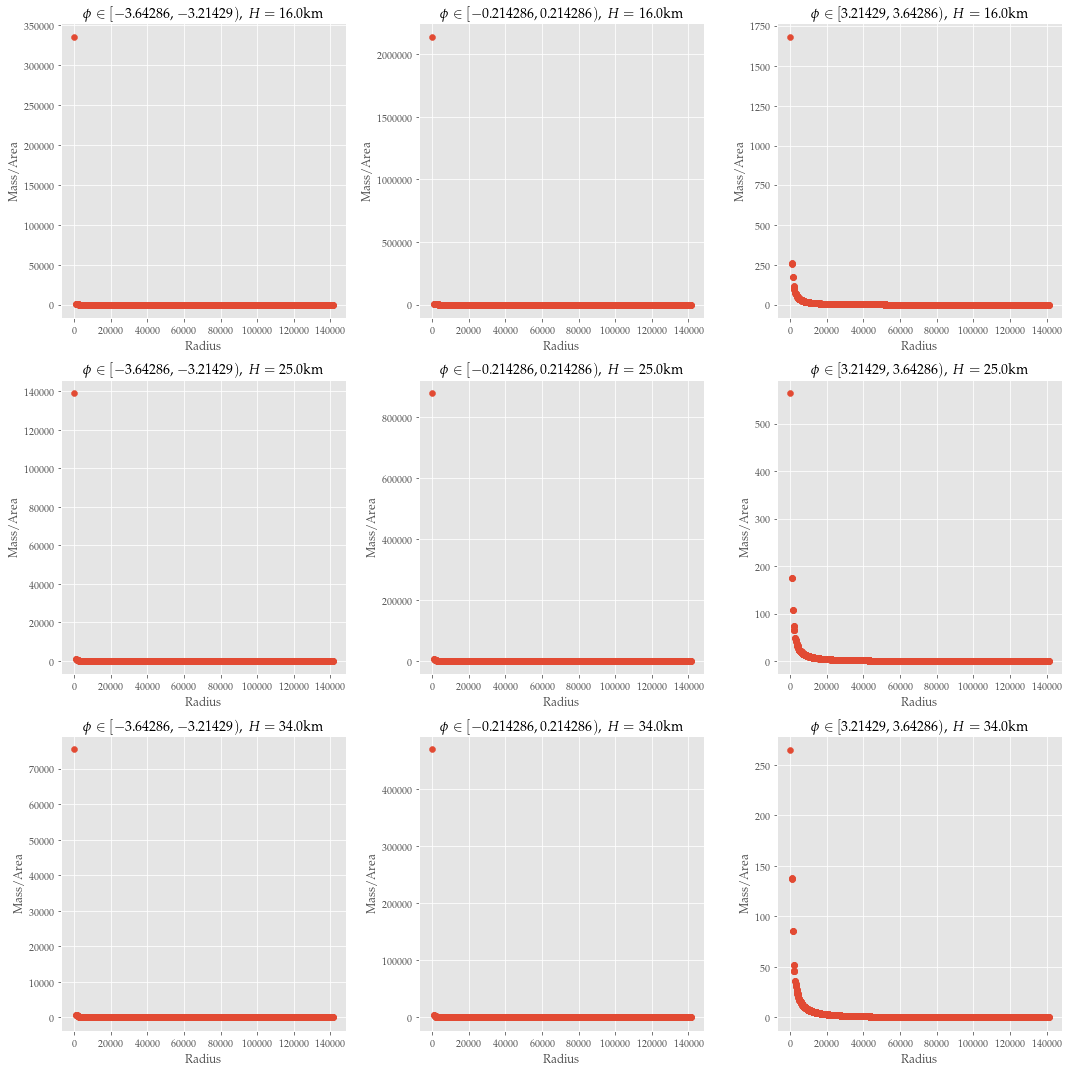

In [309]:
fig, axs = plt.subplots(3, 3, figsize=(
    15, 15), facecolor='w', edgecolor='k')
axs = axs.ravel()
k = 0
for i, H in enumerate(H_arr):
    for j, phi in enumerate(phi_arr):
        df = eruptions[H].df
        ma = df['MassArea'].values
        wt = df[phi].values
        xx = df['radius'].values
        yy = ma * (wt / 100)
        axs[k].scatter(xx, yy)
        axs[k].set_ylabel('Mass/Area')
        axs[k].set_xlabel(r'Radius')
        axs[k].set_title(r'$\phi \in %s,\:H=%s$km' % (str(phi), disp_func(H)), fontsize=14)
        k += 1
plt.tight_layout()
plt.savefig("points.png", dpi=200, format='png')
plt.show()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


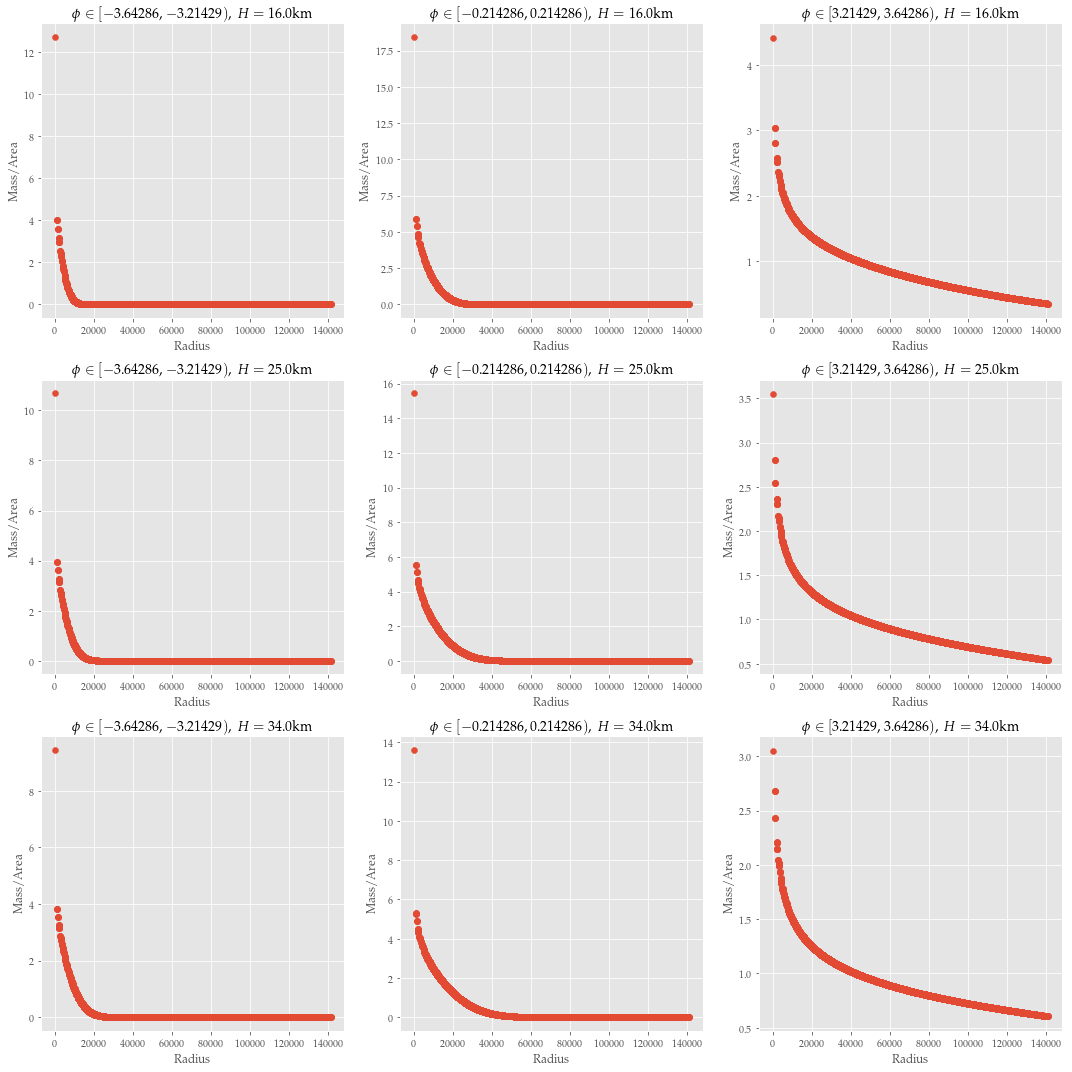

In [310]:
fig, axs = plt.subplots(3, 3, figsize=(
    15, 15), facecolor='w', edgecolor='k')
axs = axs.ravel()
k = 0
for i, H in enumerate(H_arr):
    for j, phi in enumerate(phi_arr):
        df = eruptions[H].df
        ma = df['MassArea'].values
        wt = df[phi].values
        xx = df['radius'].values
        yy = ma * (wt / 100)
        
        yy = yy ** (1/5)
        
        axs[k].scatter(xx, yy)
        axs[k].set_ylabel('Mass/Area')
        axs[k].set_xlabel(r'Radius')
        axs[k].set_title(r'$\phi \in %s,\:H=%s$km' % (str(phi), disp_func(H)), fontsize=14)
        k += 1
    plt.tight_layout()

plt.show()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


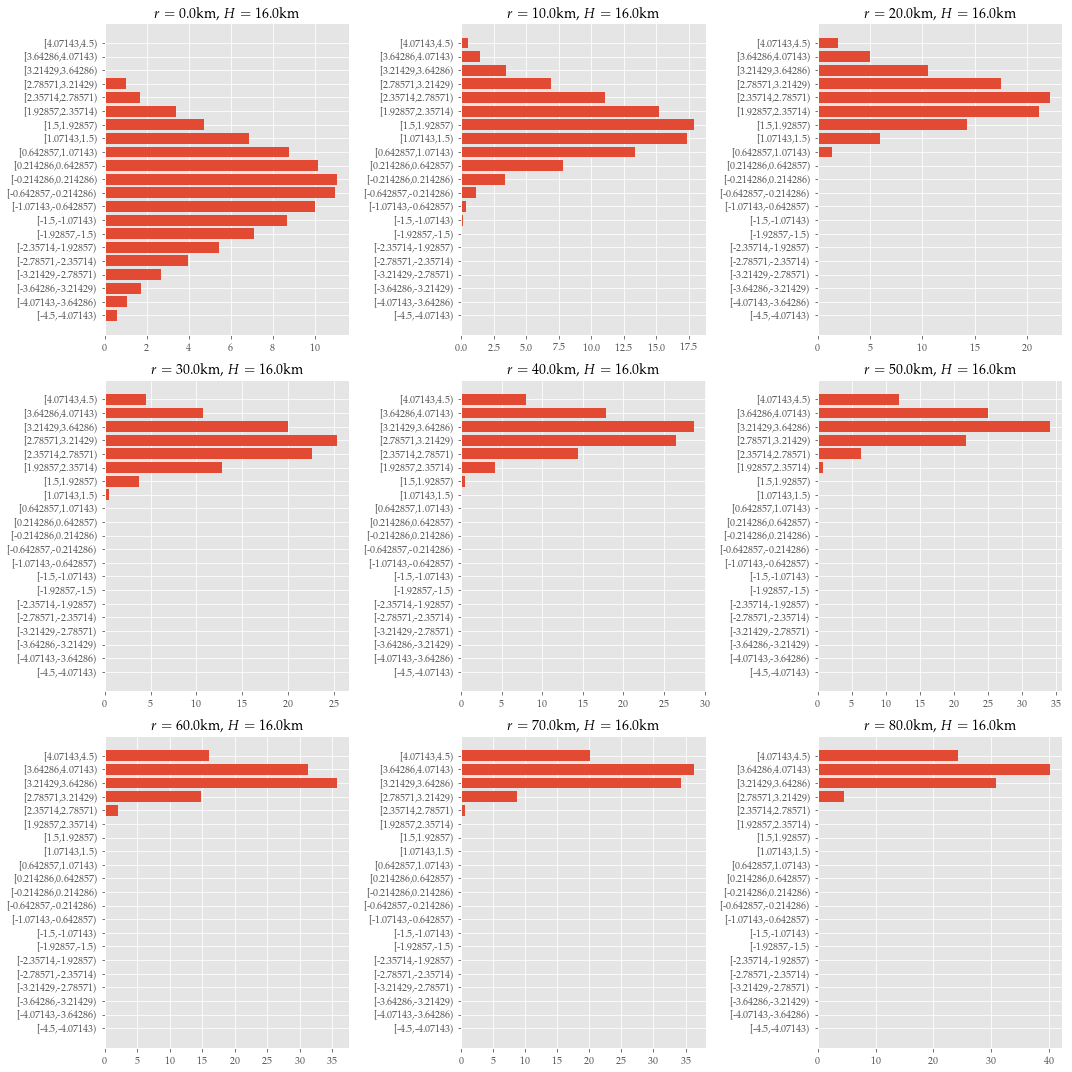

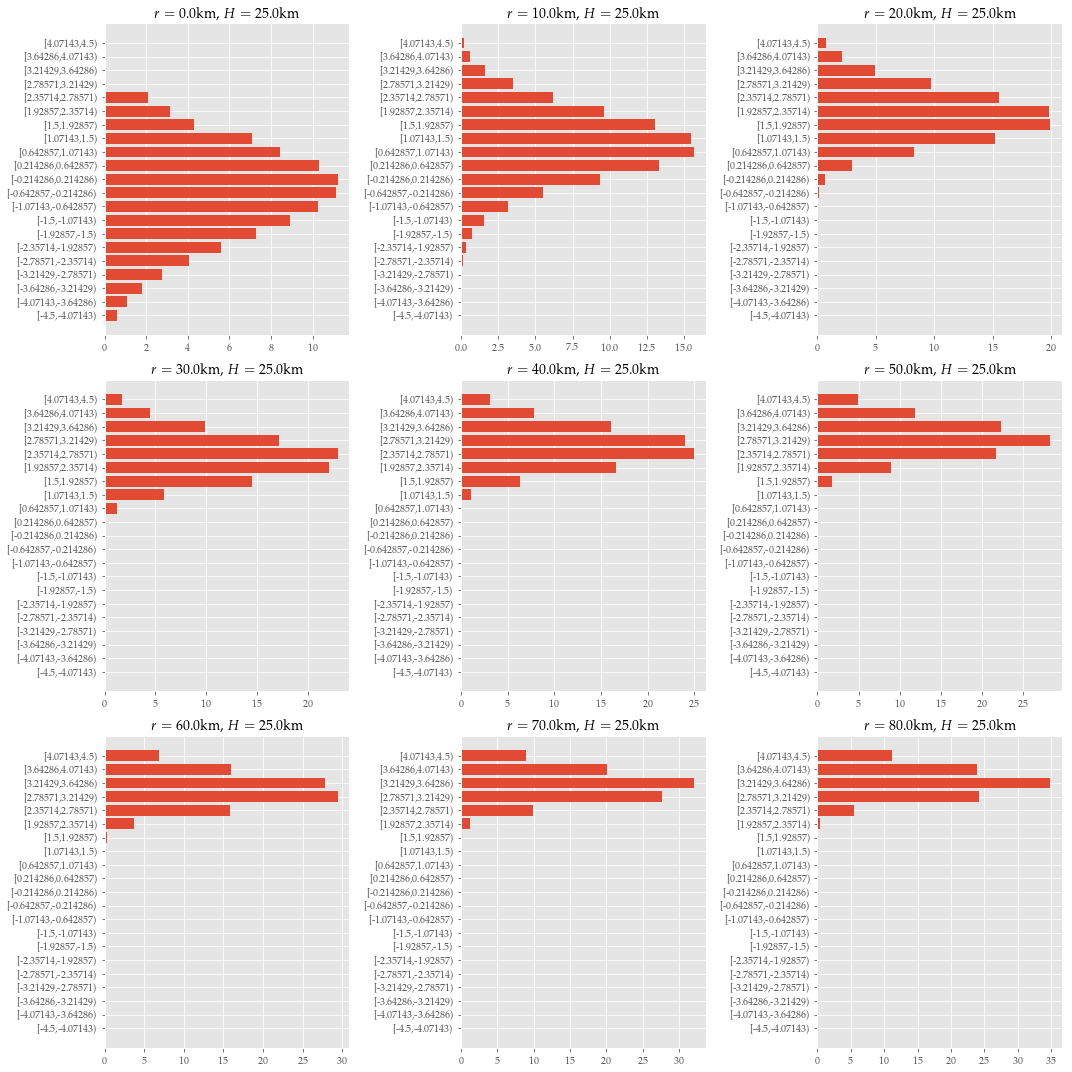

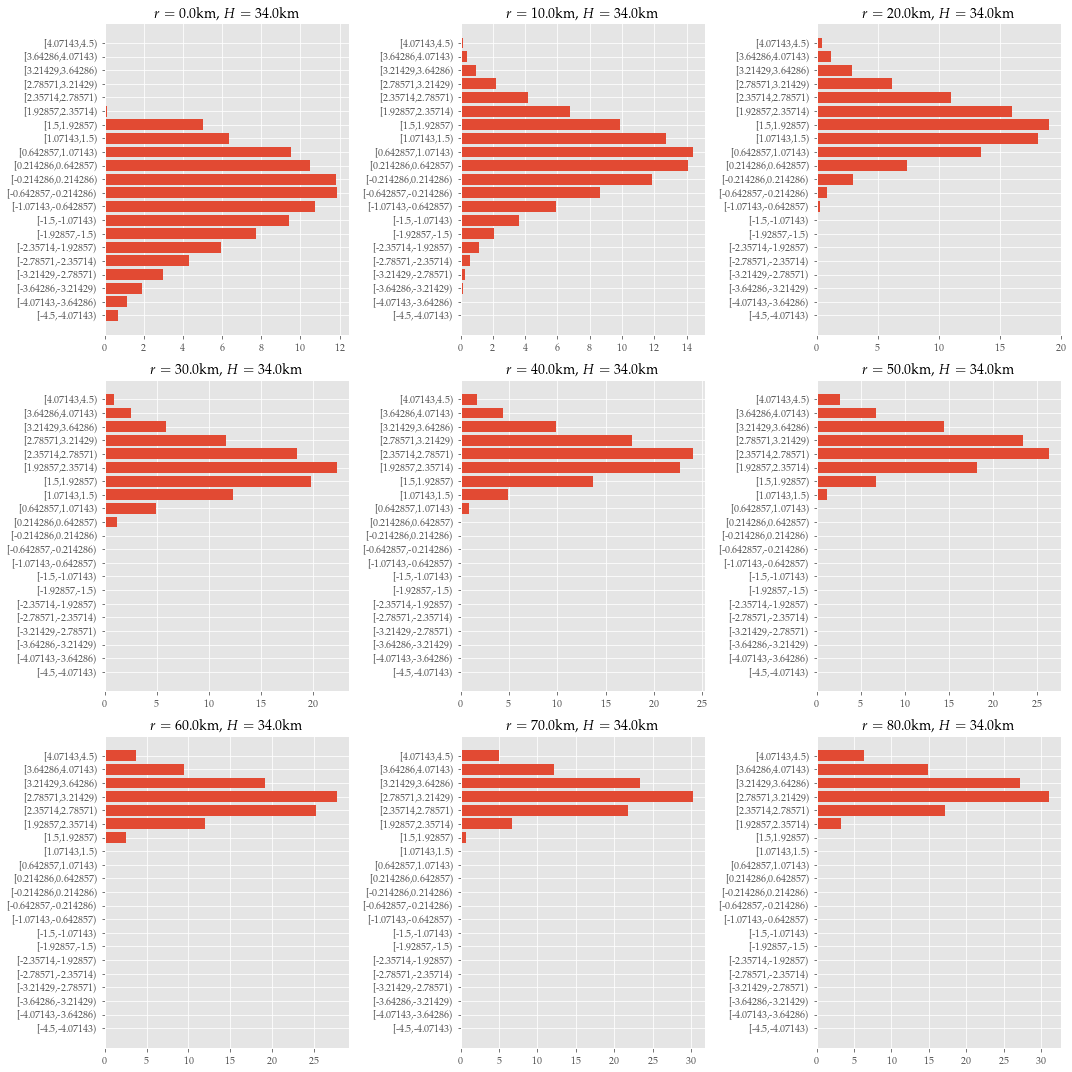

In [306]:
figures = []

for f in range(3):
    fig, axs = plt.subplots(3, 3, figsize=(
        15, 15), facecolor='w', edgecolor='k')
    axs = axs.ravel()
    figures.append((fig, axs))

radii = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000]

for i, H in enumerate(H_arr):
    df = eruptions[H].df
    fig, axs = figures[i]
    for k, r in enumerate(radii):
        samp = df[(df["Northing"]==0) & (df["Easting"]==r)]
        axs[k].barh(phis, samp[phis].values[0])
        axs[k].set_title('$r=%s$km, $H=%s$km' % (disp_func(r), disp_func(H)), fontsize=14)
    fig.tight_layout()
    fig.savefig("phi_hist_%d.png"%H, dpi=200, format='png')


c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


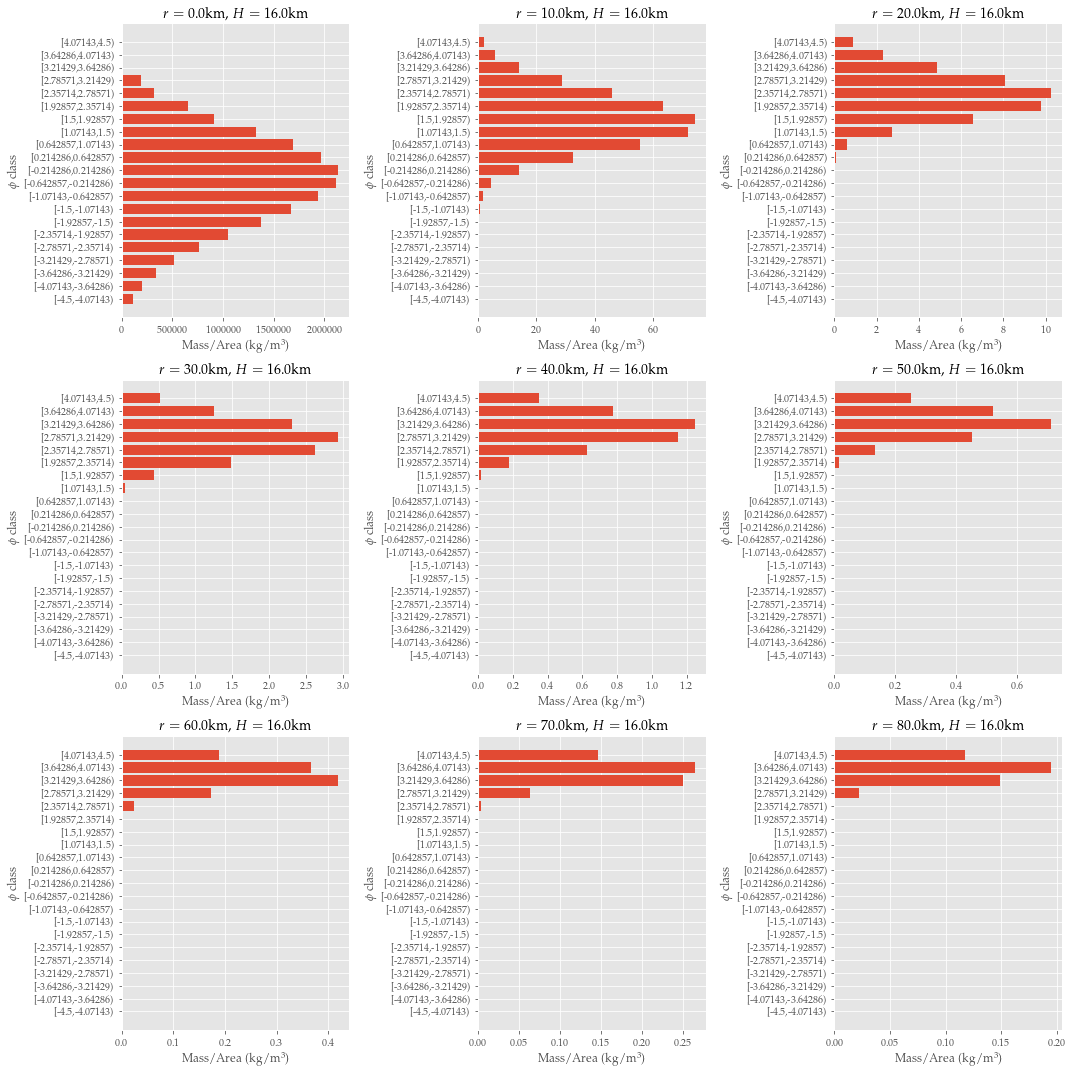

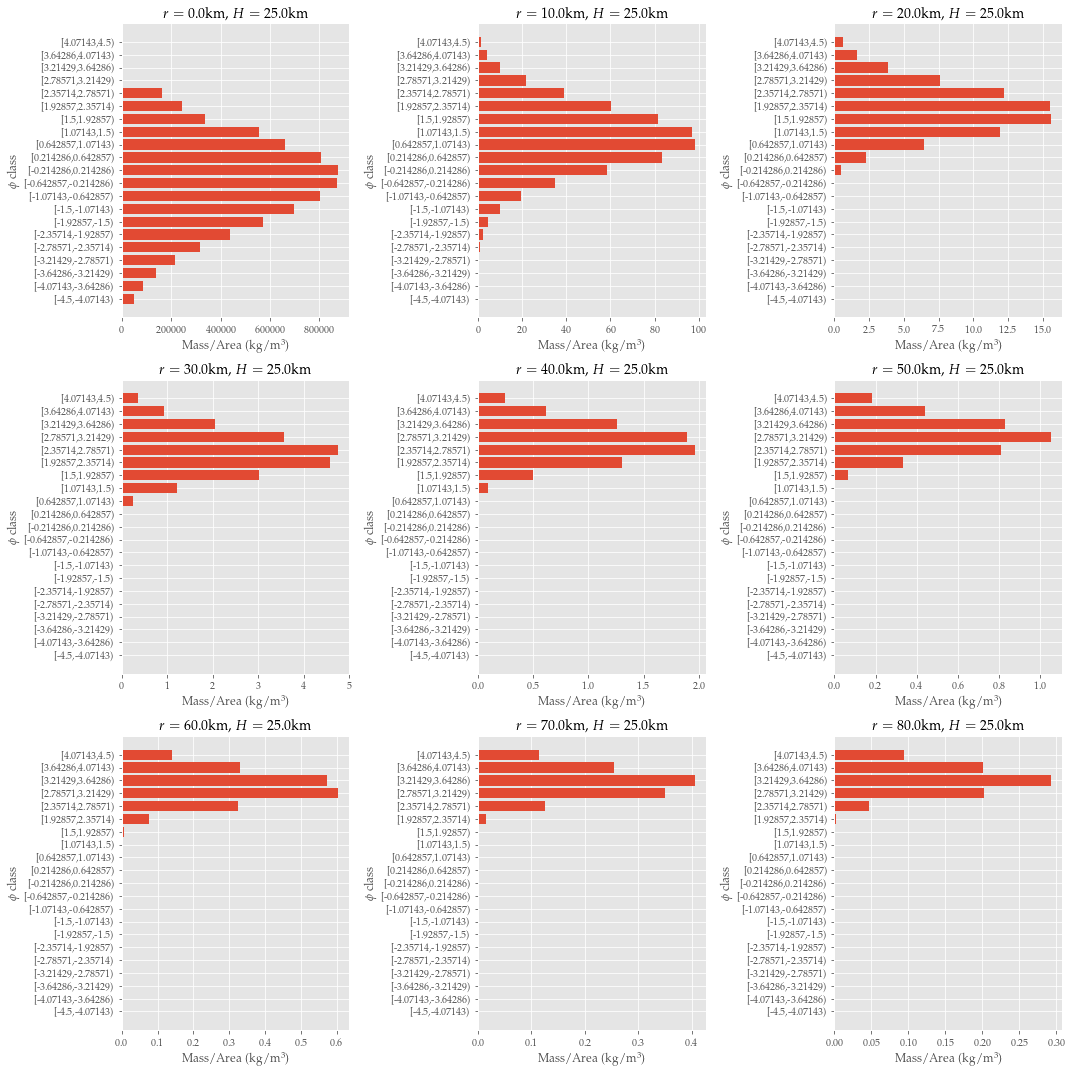

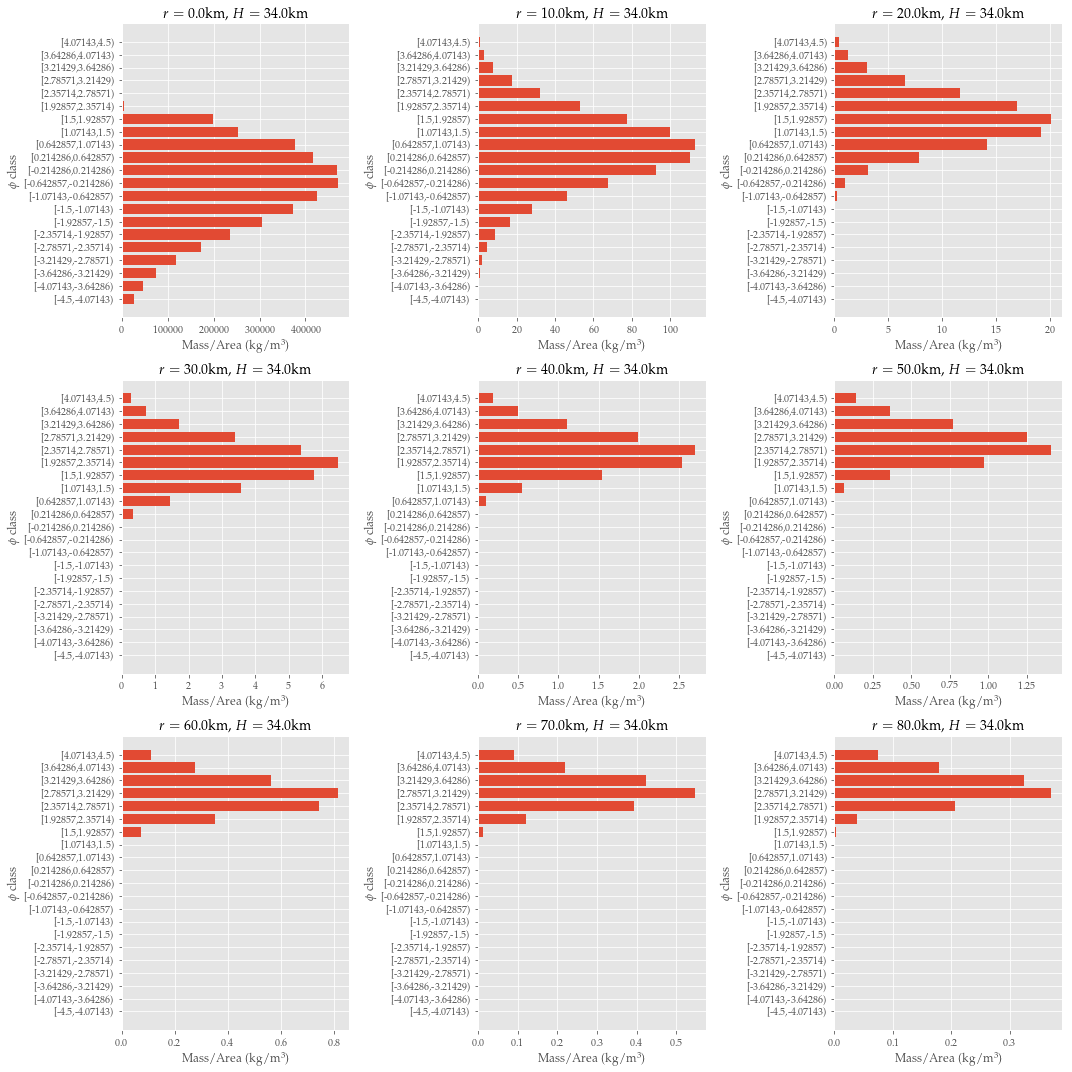

In [305]:
figures = []

for f in range(3):
    fig, axs = plt.subplots(3, 3, figsize=(
        15, 15), facecolor='w', edgecolor='k')
    axs = axs.ravel()
    figures.append((fig, axs))

radii = [0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000]

for i, H in enumerate(H_arr):
    df = eruptions[H].df
    fig, axs = figures[i]
    for k, r in enumerate(radii):
        samp = df[(df["Northing"]==0) & (df["Easting"]==r)]
        wt = samp[phis].values[0]
        ma = samp['MassArea'].values[0]
        vals = ma * (wt / 100)
        axs[k].barh(phis, vals)
        axs[k].set_title('$r=%s$km, $H=%s$km' % (disp_func(r), disp_func(H)), fontsize=14)
        axs[k].set_ylabel("$\phi$ class")
        axs[k].set_xlabel("Mass/Area (kg/m$^3$)")
    fig.tight_layout()
    fig.savefig("mass_hist_%d.png"%H, dpi=200, format='png')


In [166]:
def coef_def(y, y_fit):
    # residual sum of squares
    ss_res = np.sum((y - y_fit) ** 2)

    # total sum of squares
    ss_tot = np.sum((y - np.mean(y)) ** 2)

    # r-squared
    r2 = 1 - (ss_res / ss_tot)

    return r2

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


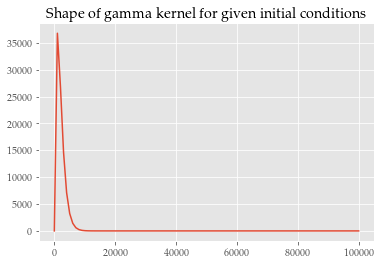

In [301]:
#Test 1: Gamma Kernel
def gamma_kernel(x, a, b, c):
    return c*(x**a)*np.exp(b*x)

def gk_sse(k, x_data, y_data):
    return sum((y_data - (gamma_kernel(x_data, *k))) ** 2)


# a: Very sensitive factor that scales the peak in both directions. 
# Must be positive for curve to start at origin. 

# b: Indicates the spread of the peak. Must be negative and small. 
# Closer to 0 spreads peak away from vent. Further from 0, sharper narrower peak. 

# c: scaling factor. 100 is about right. 

k0 = np.array([1, -1e-3, 100], dtype=np.float64)
xf = np.linspace(0, 100000, 100)
plt.plot(xf, gamma_kernel(xf, *k0))
plt.title("Shape of gamma kernel for given initial conditions")
plt.savefig("gam_kern.png", dpi=200, format='png')

_______Phi:[-3.64286,-3.21429) __ H:16000______
Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
gk_params:[ 2.65321459e-01 -1.40819784e-03  6.74476029e+02]
gk_res:3.3556924710853586e-05
_______Phi:[-0.214286,0.214286) __ H:16000______
Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
gk_params:[ 2.41873737e-02 -8.44851690e-04  1.32376883e+04]
gk_res:5.8466463952466796e-05


c:\users\nmostert\envs\spew\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


_______Phi:[3.21429,3.64286) __ H:16000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 9.78623097e-14 -3.52920362e-04  2.56695604e+02]
gk_res:0.20093550485814127


c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


_______Phi:[-3.64286,-3.21429) __ H:25000______
Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
gk_params:[ 5.71846535e-02 -9.53477325e-04  1.63240904e+03]
gk_res:0.00032829078188501004
_______Phi:[-0.214286,0.214286) __ H:25000______
Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
gk_params:[ 6.20123519e-11 -6.44795032e-04  9.05572604e+03]
gk_res:0.000291981037159994
_______Phi:[3.21429,3.64286) __ H:25000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 9.17454328e-11 -3.50629359e-04  1.70424956e+02]
gk_res:0.4450969451027058
_______Phi:[-3.64286,-3.21429) __ H:34000______
Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
gk_params:[ 1.52231143e-09 -7.60257645e-04  1.69544153e+03]
gk_res:0.000996697611554076
_______Phi:[-0.214286,0.214286) __ H:34000______
Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
gk_params:[ 5.18087131e-08 -5

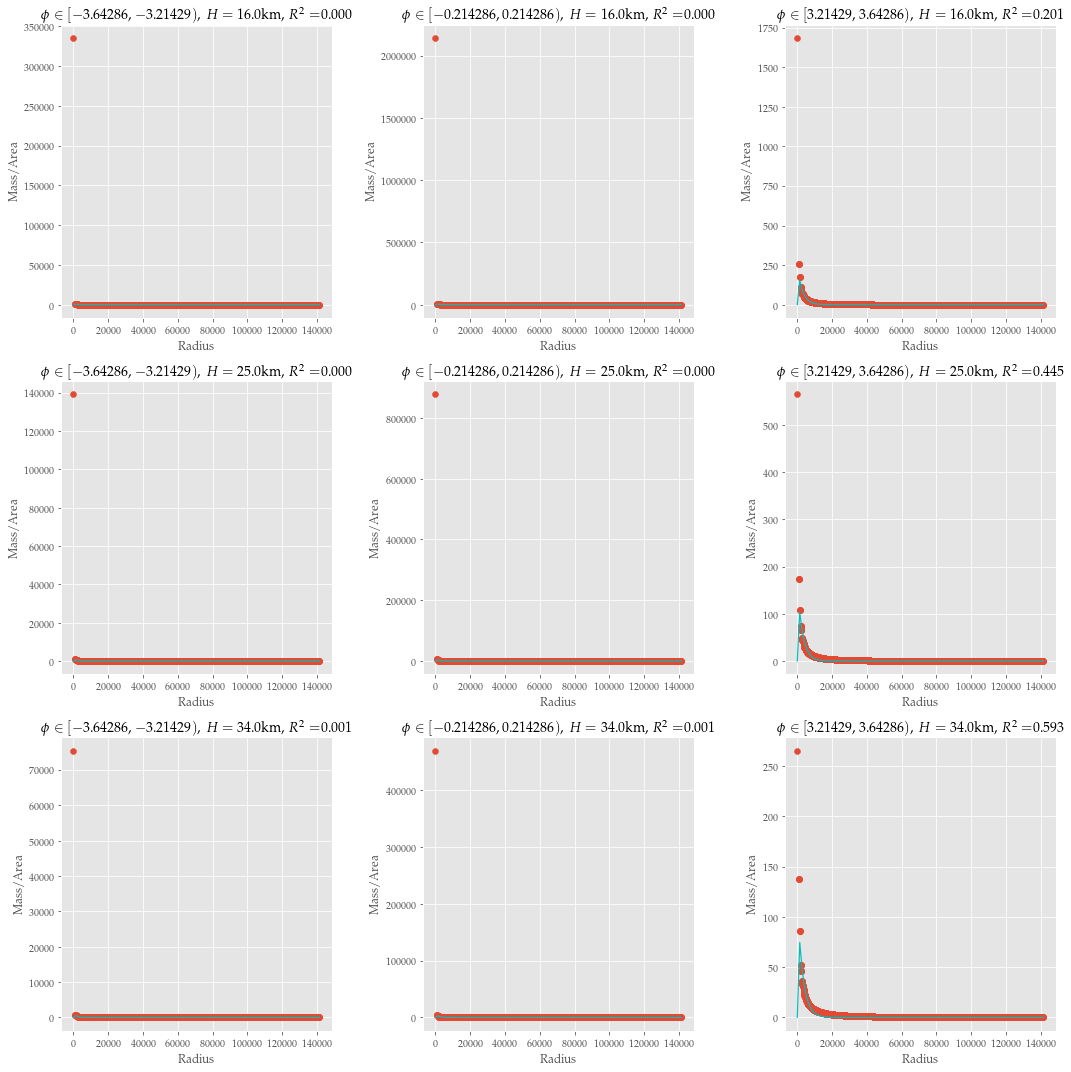

In [313]:
# No transform
# c0 = 100

fig, axs = plt.subplots(3, 3, figsize=(
    15, 15), facecolor='w', edgecolor='k')
axs = axs.ravel()
k = 0
for i, H in enumerate(H_arr):
    for j, phi in enumerate(phi_arr):
        df = eruptions[H].df
        ma = df['MassArea'].values
        wt = df[phi].values
        xx = df['radius'].values
        yy = ma * (wt / 100)
        
        x_data = xx
        y_data = yy
        
        axs[k].scatter(x_data, y_data)
        axs[k].set_title(r'$\phi \in %s,\:H=%s$km' % (str(phi), disp_func(H)), fontsize=14)
        
        k0 = np.array([1, -1e-3, 100], dtype=np.float64)

        def gk_fun(k): return gk_sse(k, x_data, y_data)
        
        gk_popt = minimize(gk_fun, k0, method='Nelder-Mead')
        
        gk_res = coef_def(y_data, gamma_kernel(x_data, *gk_popt.x))
        print("_______Phi:" + str(phi) + " __ H:" + str(H) + "______")
        print("Gamma Kernel: " + str(gk_popt.success) + " : " + str(gk_popt.message))
        print("gk_params:" + str(gk_popt.x))
        print("gk_res:" + str(gk_res))
        
        xf = np.linspace(0, x_data.max(), 100)
        gk_yf = gamma_kernel(xf, *gk_popt.x)        
        axs[k].plot(xf, gk_yf, 'c-', lw=1.2, label="GK")
        
        axs[k].set_ylabel('Mass/Area')
        axs[k].set_xlabel(r'Radius')
        axs[k].set_title(r'$\phi \in %s,\:H=%s$km, $R^2=$%0.3f' % (str(phi), disp_func(H), gk_res), fontsize=14)
        k += 1
    plt.tight_layout()
plt.savefig("no_trans.png", dpi=200, format='png')
plt.show()

_______Phi:[-3.64286,-3.21429) __ H:16000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 3.07769505e-01 -8.02849675e-04  8.49012621e+00]
gk_res:0.03372733441185727


c:\users\nmostert\envs\spew\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


_______Phi:[-0.214286,0.214286) __ H:16000______
Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
gk_params:[ 3.15188624e-11 -3.51065508e-04  1.08518384e+02]
gk_res:0.06094678346517113
_______Phi:[3.21429,3.64286) __ H:16000______
Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
gk_params:[ 1.32962126e+00 -8.28694054e-05  2.52401474e-05]
gk_res:0.5093978308002973


c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))
No handles with labels found to put in legend.


_______Phi:[-3.64286,-3.21429) __ H:25000______
Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
gk_params:[ 6.69309410e-02 -4.91044338e-04  3.13334979e+01]
gk_res:0.10023757267853672
_______Phi:[-0.214286,0.214286) __ H:25000______
Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
gk_params:[ 6.54276446e-11 -2.37840695e-04  7.56077427e+01]
gk_res:0.14700001397221008
_______Phi:[3.21429,3.64286) __ H:25000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 1.22770630e-09 -2.55110154e-05  3.62246068e+00]
gk_res:0.808658616858231


No handles with labels found to put in legend.


_______Phi:[-3.64286,-3.21429) __ H:34000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 1.19954874e-08 -3.67795527e-04  4.02062501e+01]
gk_res:0.18661726865576755
_______Phi:[-0.214286,0.214286) __ H:34000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 1.04135871e-10 -1.84003999e-04  5.93116065e+01]
gk_res:0.24964273240834078
_______Phi:[3.21429,3.64286) __ H:34000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 7.14715242e-09 -2.12647687e-05  2.88815592e+00]
gk_res:0.7885026072850551


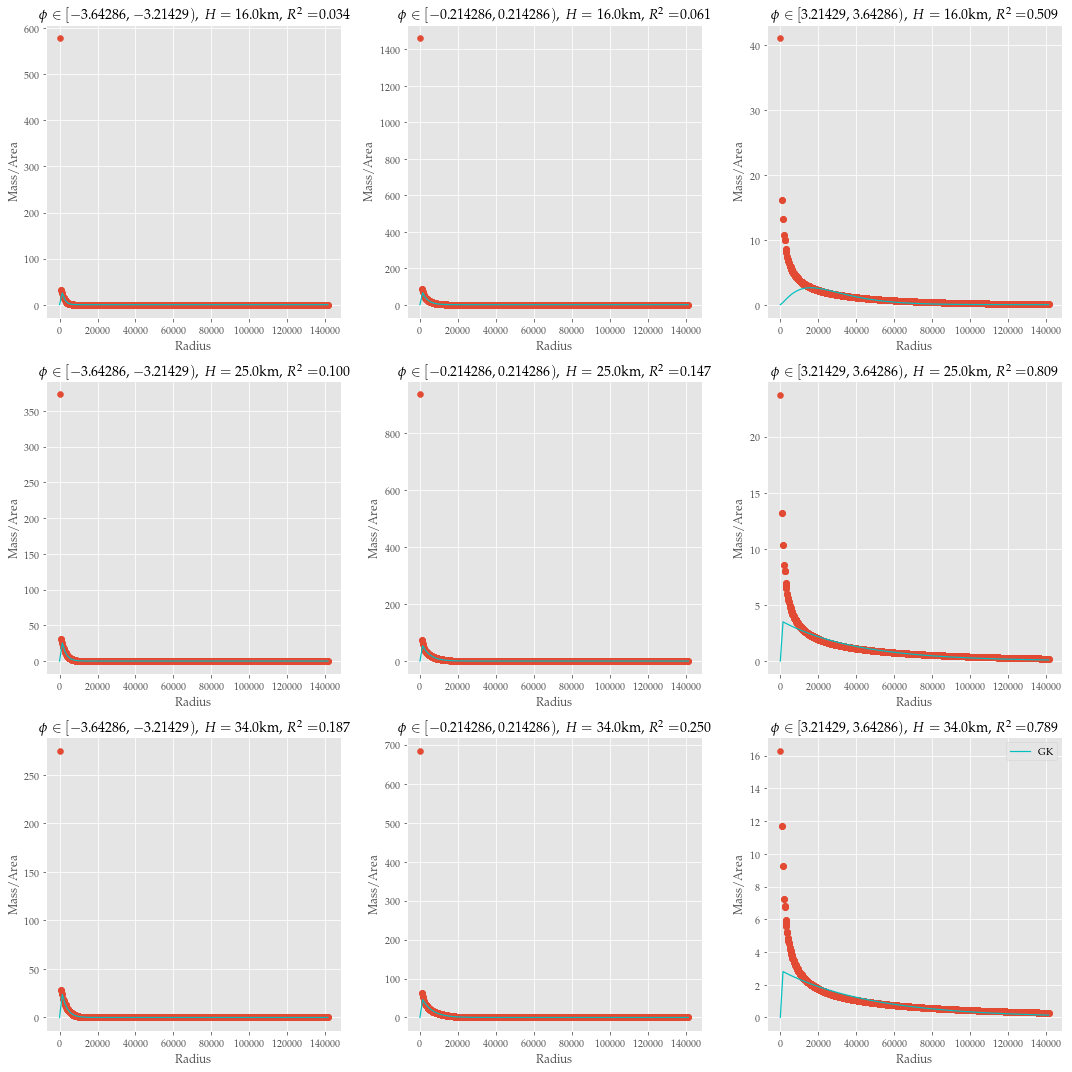

In [296]:
# Sqrt transform
# c0 = 1

fig, axs = plt.subplots(3, 3, figsize=(
    15, 15), facecolor='w', edgecolor='k')
axs = axs.ravel()
k = 0
for i, H in enumerate(H_arr):
    for j, phi in enumerate(phi_arr):
        df = eruptions[H].df
        ma = df['MassArea'].values
        wt = df[phi].values
        xx = df['radius'].values
        yy = ma * (wt / 100)
        
        x_data = xx
        y_data = yy ** (1/2)
        
        axs[k].scatter(x_data, y_data)
        axs[k].set_title(r'$\phi \in %s,\:H=%s$km' % (str(phi), disp_func(H)), fontsize=14)
        
        k0 = np.array([1, -1e-3, 1], dtype=np.float64)

        def gk_fun(k): return gk_sse(k, x_data, y_data)
        
        gk_popt = minimize(gk_fun, k0, method='Nelder-Mead')
        
        gk_res = coef_def(y_data, gamma_kernel(x_data, *gk_popt.x))
        print("_______Phi:" + str(phi) + " __ H:" + str(H) + "______")
        print("Gamma Kernel: " + str(gk_popt.success) + " : " + str(gk_popt.message))
        print("gk_params:" + str(gk_popt.x))
        print("gk_res:" + str(gk_res))
        
        xf = np.linspace(0, x_data.max(), 100)
        gk_yf = gamma_kernel(xf, *gk_popt.x)        
        axs[k].plot(xf, gk_yf, 'c-', lw=1.2, label="GK")
        
        axs[k].set_ylabel('Mass/Area')
        axs[k].set_xlabel(r'Radius')
        axs[k].set_title(r'$\phi \in %s,\:H=%s$km, $R^2=$%0.3f' % (str(phi), disp_func(H), gk_res), fontsize=14)
        k += 1
    plt.tight_layout()
plt.savefig("trans_12.png", dpi=200, format='png')
plt.show()

_______Phi:[-3.64286,-3.21429) __ H:16000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 3.35208794e-01 -5.96169961e-04  1.77825442e+00]
gk_res:0.27300102001251647


c:\users\nmostert\envs\spew\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


_______Phi:[-0.214286,0.214286) __ H:16000______
Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
gk_params:[ 2.54420128e-06 -2.29628986e-04  2.24170295e+01]
gk_res:0.46290721776831234
_______Phi:[3.21429,3.64286) __ H:16000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 4.49329909e-10 -2.10316991e-05  2.70649533e+00]
gk_res:0.9299633838805893


c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


_______Phi:[-3.64286,-3.21429) __ H:25000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 1.54333680e-01 -3.67696969e-04  4.74528096e+00]
gk_res:0.5031317622637077
_______Phi:[-0.214286,0.214286) __ H:25000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 2.80706048e-11 -1.54144798e-04  1.74962086e+01]
gk_res:0.6781630452115217
_______Phi:[3.21429,3.64286) __ H:25000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 3.95787750e-09 -1.45203974e-05  2.10595873e+00]
gk_res:0.8929366866686262
_______Phi:[-3.64286,-3.21429) __ H:34000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 8.93279305e-02 -2.72659977e-04  6.34202567e+00]
gk_res:0.6560169725071224
_______Phi:[-0.214286,0.214286) __ H:34000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 1.94462700e-09 -1.19292752e-04  1.48891315e+01]
gk_res:0.7914266933490559
_______Phi:[3.21429,3.64286) __ H:3

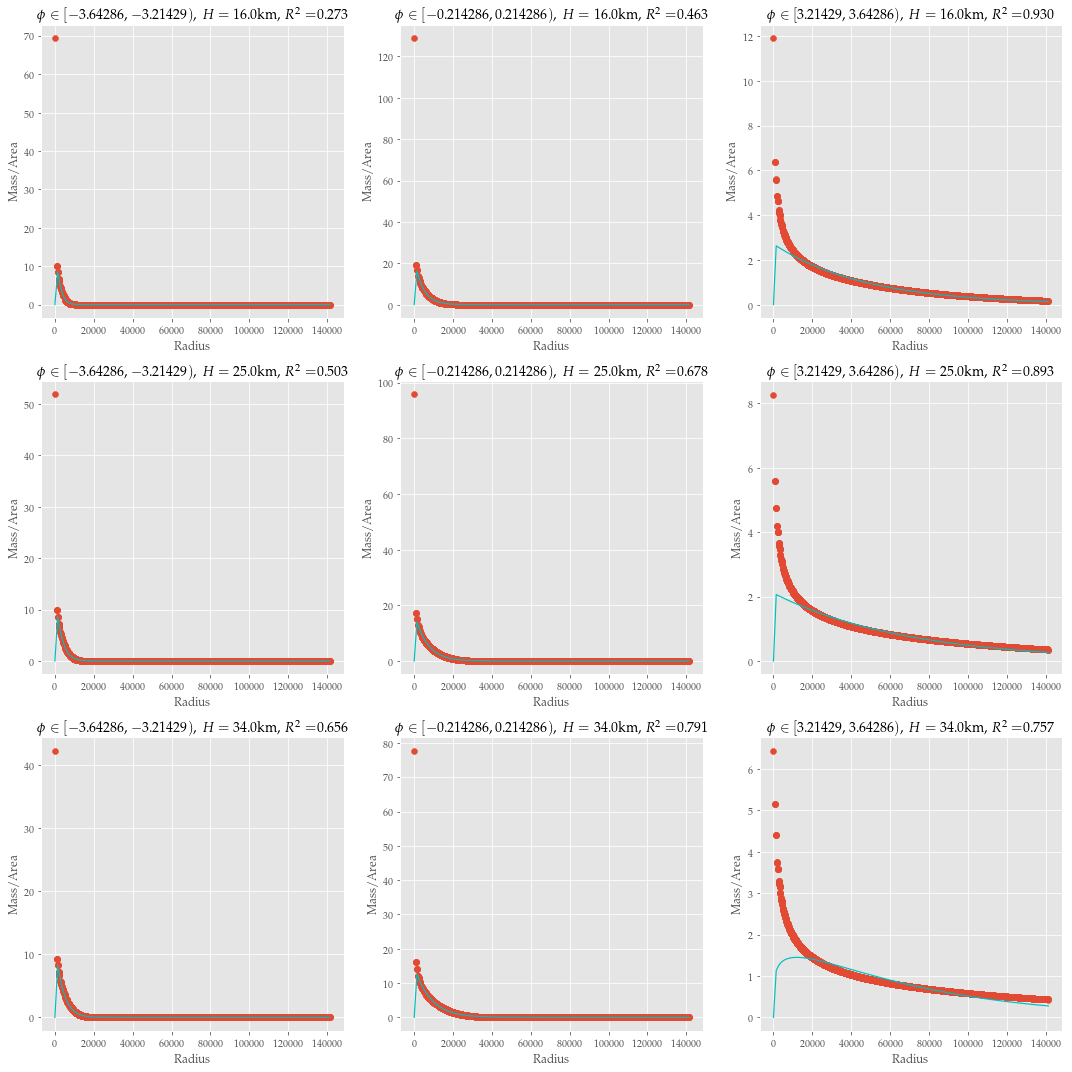

In [298]:
# cube root transform
# c0 = 0.2

fig, axs = plt.subplots(3, 3, figsize=(
    15, 15), facecolor='w', edgecolor='k')
axs = axs.ravel()
k = 0
for i, H in enumerate(H_arr):
    for j, phi in enumerate(phi_arr):
        df = eruptions[H].df
        ma = df['MassArea'].values
        wt = df[phi].values
        xx = df['radius'].values
        yy = ma * (wt / 100)
        
        x_data = xx
        y_data = yy ** (1/3)
        
        axs[k].scatter(x_data, y_data)
        axs[k].set_title(r'$\phi \in %s,\:H=%s$km' % (str(phi), disp_func(H)), fontsize=14)
        
        k0 = np.array([1, -1e-3, 0.2], dtype=np.float64)

        def gk_fun(k): return gk_sse(k, x_data, y_data)
        
        gk_popt = minimize(gk_fun, k0, method='Nelder-Mead')
        
        gk_res = coef_def(y_data, gamma_kernel(x_data, *gk_popt.x))
        print("_______Phi:" + str(phi) + " __ H:" + str(H) + "______")
        print("Gamma Kernel: " + str(gk_popt.success) + " : " + str(gk_popt.message))
        print("gk_params:" + str(gk_popt.x))
        print("gk_res:" + str(gk_res))
        
        xf = np.linspace(0, x_data.max(), 100)
        gk_yf = gamma_kernel(xf, *gk_popt.x)        
        axs[k].plot(xf, gk_yf, 'c-', lw=1.2, label="GK")
        
        axs[k].set_ylabel('Mass/Area')
        axs[k].set_xlabel(r'Radius')
        axs[k].set_title(r'$\phi \in %s,\:H=%s$km, $R^2=$%0.3f' % (str(phi), disp_func(H), gk_res), fontsize=14)
        k += 1
    plt.tight_layout()

plt.savefig("trans_13.png", dpi=200, format='png')
plt.show()



_______Phi:[-3.64286,-3.21429) __ H:16000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 3.57459133e-01 -4.89646932e-04  7.58846279e-01]
gk_res:0.5816534537166849
_______Phi:[-0.214286,0.214286) __ H:16000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 7.09912475e-02 -1.88985875e-04  6.21787001e+00]
gk_res:0.7843446697559316


c:\users\nmostert\envs\spew\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


_______Phi:[3.21429,3.64286) __ H:16000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 7.46195175e-10 -1.50025614e-05  2.03336117e+00]
gk_res:0.9565162763406805


c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


_______Phi:[-3.64286,-3.21429) __ H:25000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 2.15300825e-01 -3.06010649e-04  1.61602446e+00]
gk_res:0.7767293360292231
_______Phi:[-0.214286,0.214286) __ H:25000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 5.20678636e-02 -1.24748164e-04  5.83110991e+00]
gk_res:0.8935648130361066
_______Phi:[3.21429,3.64286) __ H:25000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 9.78374011e-08 -1.03012873e-05  1.68993558e+00]
gk_res:0.9198552232590936
_______Phi:[-3.64286,-3.21429) __ H:34000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 1.64913754e-01 -2.28803896e-04  1.99639419e+00]
gk_res:0.8622785397901119
_______Phi:[-0.214286,0.214286) __ H:34000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 5.49513888e-02 -9.73621520e-05  5.00621291e+00]
gk_res:0.9341348737102473
_______Phi:[3.21429,3.64286) __ H:3

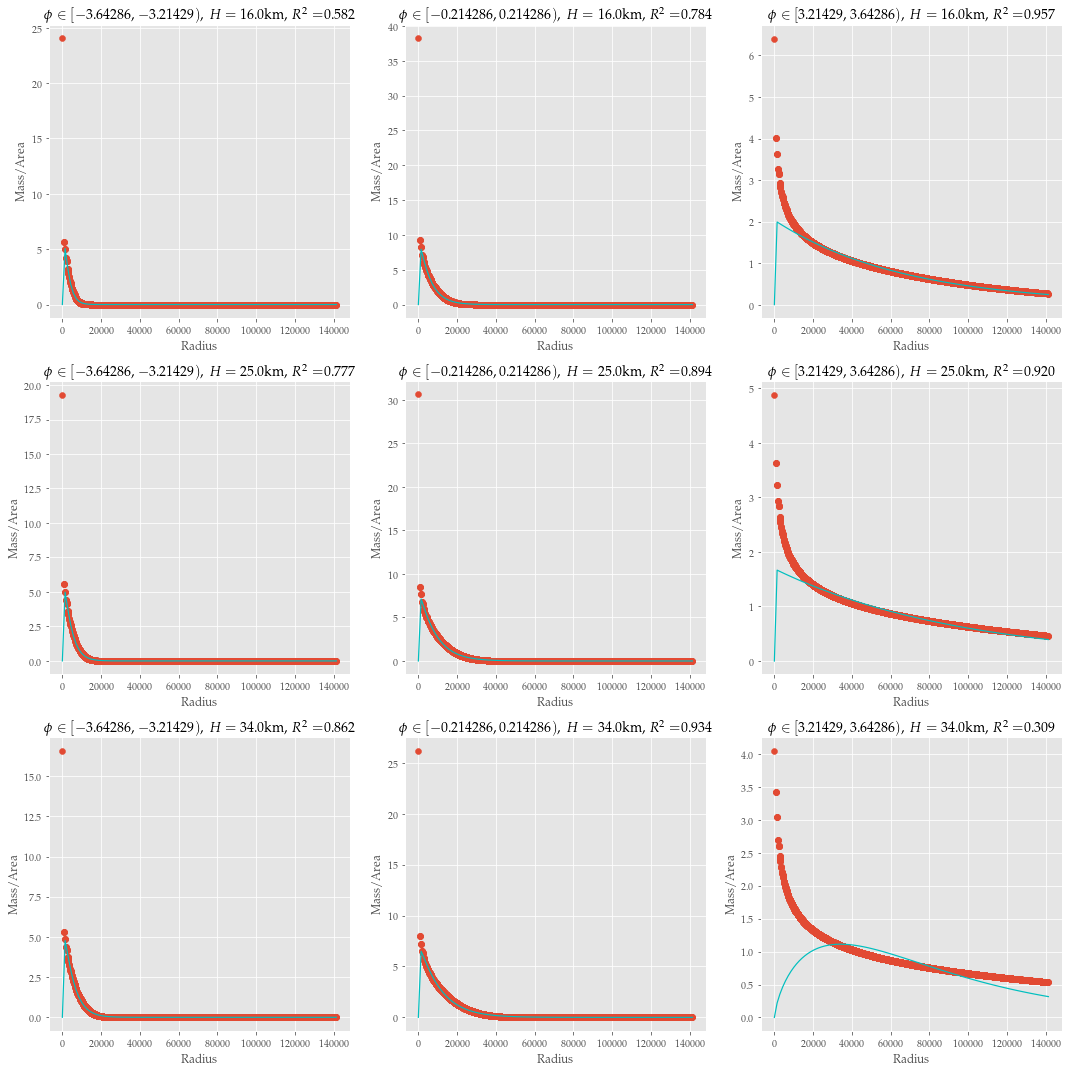

In [299]:
# fourth root transform
# c0 = 0.1

fig, axs = plt.subplots(3, 3, figsize=(
    15, 15), facecolor='w', edgecolor='k')
axs = axs.ravel()
k = 0
for i, H in enumerate(H_arr):
    for j, phi in enumerate(phi_arr):
        df = eruptions[H].df
        ma = df['MassArea'].values
        wt = df[phi].values
        xx = df['radius'].values
        yy = ma * (wt / 100)
        
        x_data = xx
        y_data = yy ** (1/4)
        
        axs[k].scatter(x_data, y_data)
        axs[k].set_title(r'$\phi \in %s,\:H=%s$km' % (str(phi), disp_func(H)), fontsize=14)
        
        k0 = np.array([1, -1e-3, 0.1], dtype=np.float64)

        def gk_fun(k): return gk_sse(k, x_data, y_data)
        
        gk_popt = minimize(gk_fun, k0, method='Nelder-Mead')
        
        gk_res = coef_def(y_data, gamma_kernel(x_data, *gk_popt.x))
        print("_______Phi:" + str(phi) + " __ H:" + str(H) + "______")
        print("Gamma Kernel: " + str(gk_popt.success) + " : " + str(gk_popt.message))
        print("gk_params:" + str(gk_popt.x))
        print("gk_res:" + str(gk_res))
        
        xf = np.linspace(0, x_data.max(), 100)
        gk_yf = gamma_kernel(xf, *gk_popt.x)        
        axs[k].plot(xf, gk_yf, 'c-', lw=1.2, label="GK")
        
        axs[k].set_ylabel('Mass/Area')
        axs[k].set_xlabel(r'Radius')
        axs[k].set_title(r'$\phi \in %s,\:H=%s$km, $R^2=$%0.3f' % (str(phi), disp_func(H), gk_res), fontsize=14)
        k += 1
    plt.tight_layout()

plt.savefig("trans_14.png", dpi=200, format='png')
plt.show()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


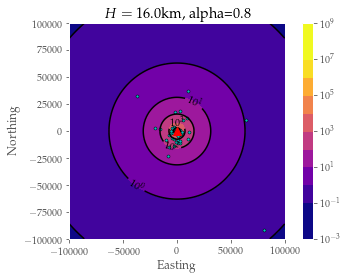

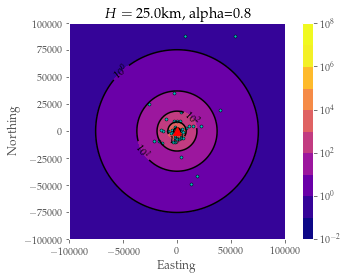

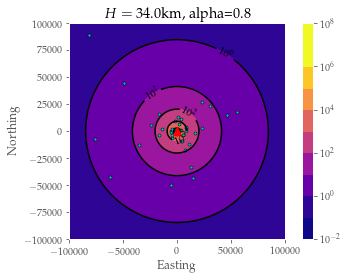

In [293]:
# SAMPLING vs point dropping

a = 0.8
for i, H in enumerate(H_arr):
    sample = eruptions[H].sample(50, alpha=a)
    fig, ax = eruptions[H].plot_contour(background="fill", cmap="plasma", 
                                        line_colors="k")
    sample.plot(ax=ax, c='c', marker='.', edgecolor="k")
    plt.title("$H=%s$km, alpha=$%.1f$"% (disp_func(H), a))
    plt.savefig("samp_ex_%d_08.png"%(H), dpi=200, format='png')
    plt.show()

c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


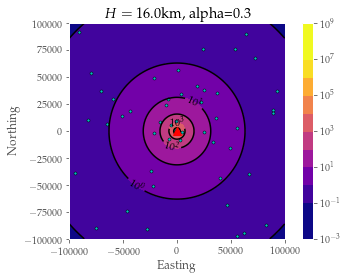

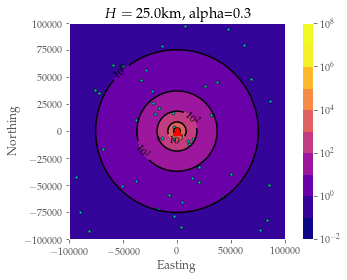

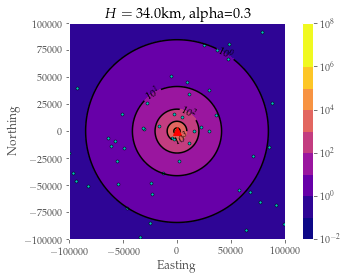

In [292]:
# SAMPLING vs point dropping

a = 0.3
for i, H in enumerate(H_arr):
    sample = eruptions[H].sample(50, alpha=a)
    fig, ax = eruptions[H].plot_contour(background="fill", cmap="plasma", 
                                        line_colors="k")
    sample.plot(ax=ax, c='c', marker='.', edgecolor="k")
    plt.title("$H=%s$km, alpha=$%.1f$"% (disp_func(H), a))
    plt.savefig("samp_ex_%d_03.png"%(H), dpi=200, format='png')
    plt.show()

_______Phi:[-3.64286,-3.21429) __ H:16000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 2.01792004e-02 -1.72175880e-04  5.32575877e+00]
gk_res:0.24989136900172004
_______Phi:[-0.214286,0.214286) __ H:16000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 1.95582643e-09 -8.79167981e-05  7.52185862e+00]
gk_res:0.1534143479302742
_______Phi:[3.21429,3.64286) __ H:16000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 8.38153457e-09 -3.52260024e-05  2.57559185e+00]
gk_res:0.18585584499105834


c:\users\nmostert\envs\spew\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


_______Phi:[-3.64286,-3.21429) __ H:25000______
Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
gk_params:[ 4.27961880e-02 -1.76233924e-04  4.48492082e+00]
gk_res:0.1673021923072231
_______Phi:[-0.214286,0.214286) __ H:25000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 2.77806980e-10 -8.45954915e-05  7.60955326e+00]
gk_res:0.14819524489747526
_______Phi:[3.21429,3.64286) __ H:25000______
Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
gk_params:[ 9.89850530e-01 -1.69400057e-04  1.21255215e-03]
gk_res:-0.8100555538266305
_______Phi:[-3.64286,-3.21429) __ H:34000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 1.16351583e-07 -1.64111696e-04  6.06174721e+00]
gk_res:0.23517222404794969
_______Phi:[-0.214286,0.214286) __ H:34000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 4.31241349e-09 -8.24641614e-05  7.34755315e+00]
gk_res:0.1040363

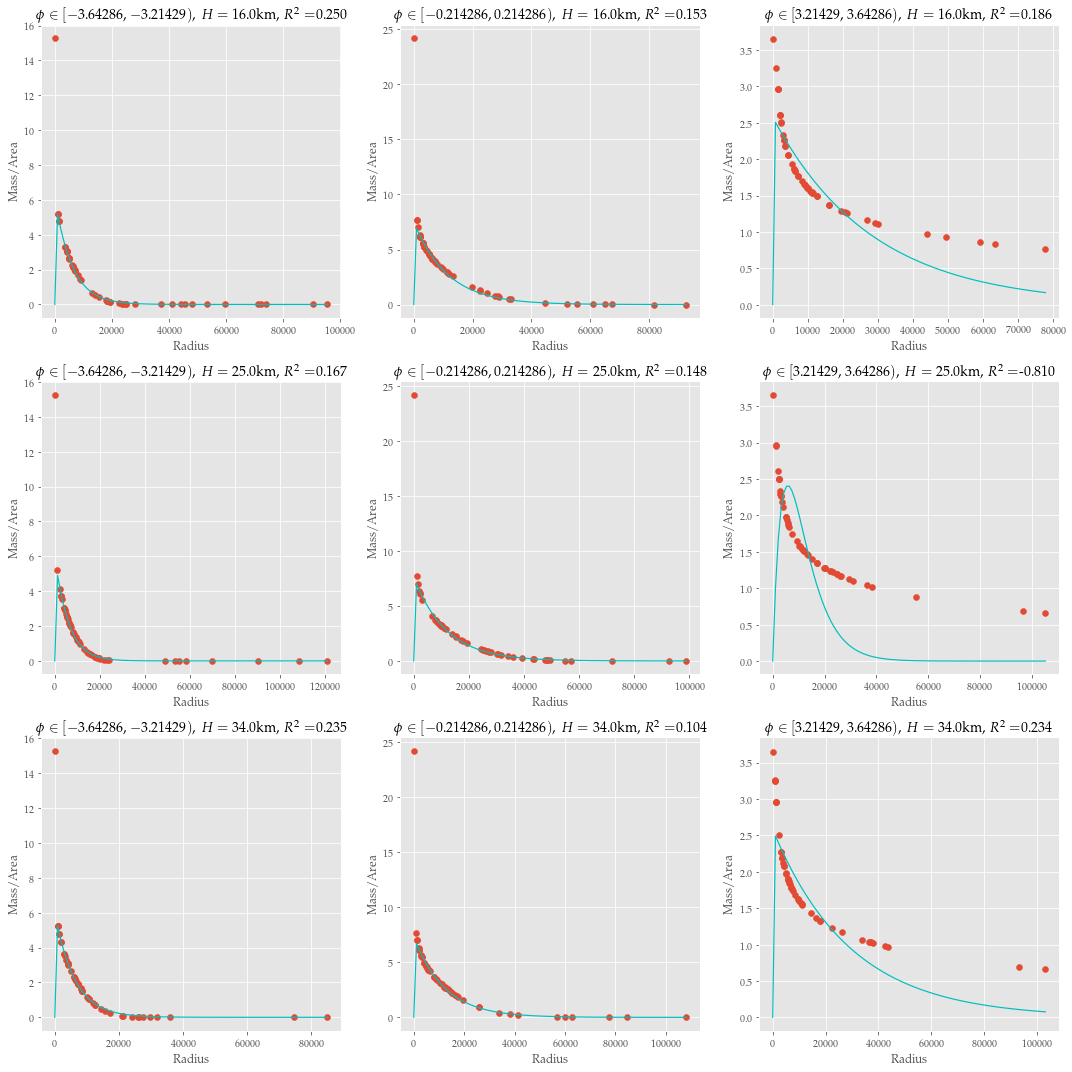

In [300]:
# sampling
# alpha=0.8

fig, axs = plt.subplots(3, 3, figsize=(
    15, 15), facecolor='w', edgecolor='k')
axs = axs.ravel()
k = 0
for i, H in enumerate(H_arr):
    for j, phi in enumerate(phi_arr):
        df = eruptions[v].sample(50, alpha=0.8)
        ma = df['MassArea'].values
        wt = df[phi].values
        xx = df['radius'].values
        yy = ma * (wt / 100)
        
        x_data = xx
        y_data = yy ** (1/4)
        
        axs[k].scatter(x_data, y_data)
        axs[k].set_title(r'$\phi \in %s,\:H=%s$km' % (str(phi), disp_func(H)), fontsize=14)
        
        k0 = np.array([1, -1e-3, 0.1], dtype=np.float64)

        def gk_fun(k): return gk_sse(k, x_data, y_data)
        
        gk_popt = minimize(gk_fun, k0, method='Nelder-Mead')
        
        gk_res = coef_def(y_data, gamma_kernel(x_data, *gk_popt.x))
        print("_______Phi:" + str(phi) + " __ H:" + str(H) + "______")
        print("Gamma Kernel: " + str(gk_popt.success) + " : " + str(gk_popt.message))
        print("gk_params:" + str(gk_popt.x))
        print("gk_res:" + str(gk_res))
        
        xf = np.linspace(0, x_data.max(), 100)
        gk_yf = gamma_kernel(xf, *gk_popt.x)        
        axs[k].plot(xf, gk_yf, 'c-', lw=1.2, label="GK")
        
        axs[k].set_ylabel('Mass/Area')
        axs[k].set_xlabel(r'Radius')
        axs[k].set_title(r'$\phi \in %s,\:H=%s$km, $R^2=$%0.3f' % (str(phi), disp_func(H), gk_res), fontsize=14)
        k += 1
    plt.tight_layout()

plt.savefig("fit_samp_08.png", dpi=200, format='png')
plt.show()

_______Phi:[-3.64286,-3.21429) __ H:16000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 4.38122300e-01 -2.28952007e-04  2.04568454e-01]
gk_res:0.05696671550097743
_______Phi:[-0.214286,0.214286) __ H:16000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 4.57733643e-01 -1.13674666e-04  1.58823733e-01]
gk_res:0.9978037269623014
_______Phi:[3.21429,3.64286) __ H:16000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 2.14348393e-01 -1.29662382e-05  1.89516481e-01]
gk_res:0.8071855443648372
_______Phi:[-3.64286,-3.21429) __ H:25000______
Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
gk_params:[ 6.36959362e-01 -2.47909971e-04  3.99745780e-02]
gk_res:0.9997230749071059
_______Phi:[-0.214286,0.214286) __ H:25000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 4.35970000e-01 -1.09428289e-04  1.78965951e-01]
gk_res:0.999077681247964
_______Phi:[3.

c:\users\nmostert\envs\spew\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until
c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


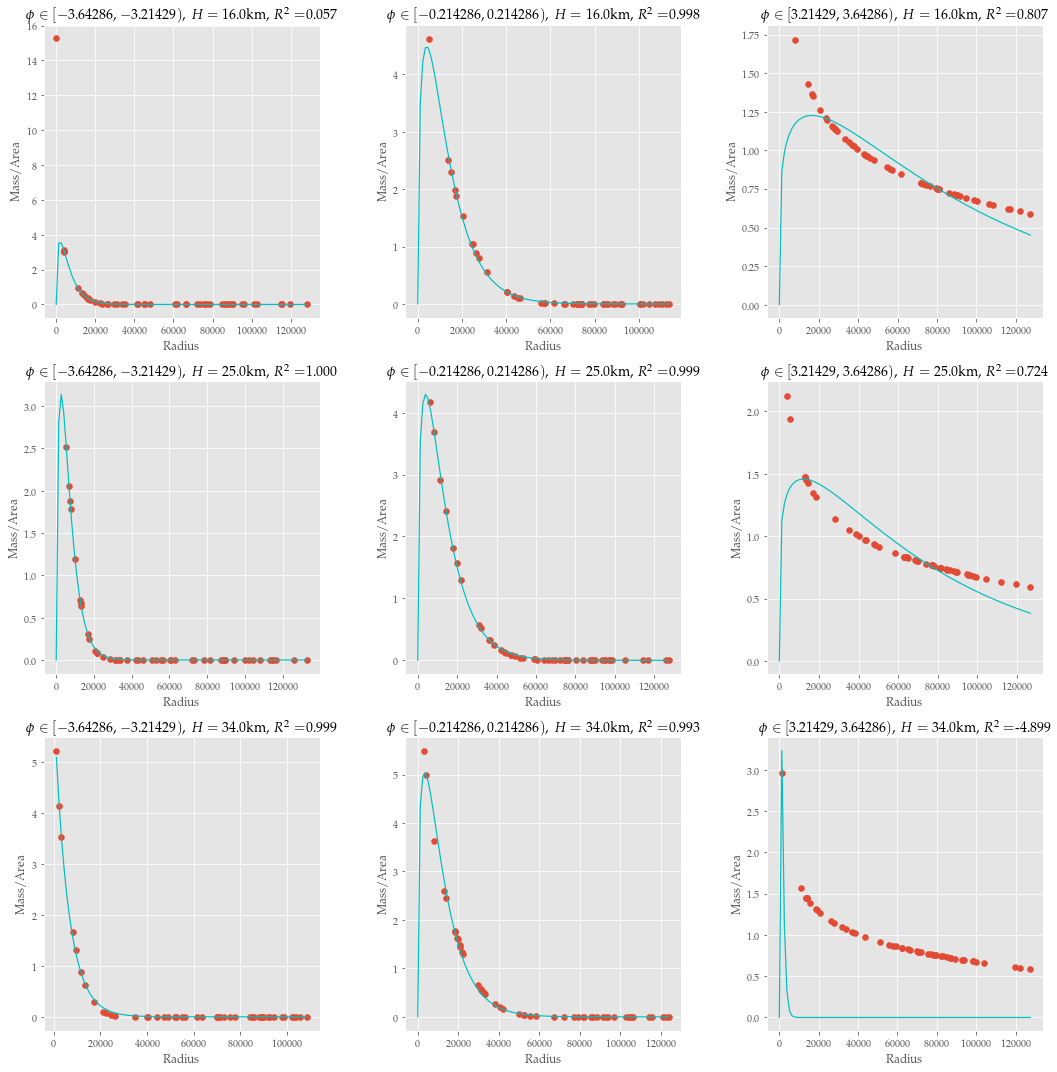

In [282]:
# sampling
# alpha=0.3

fig, axs = plt.subplots(3, 3, figsize=(
    15, 15), facecolor='w', edgecolor='k')
axs = axs.ravel()
k = 0
for i, H in enumerate(H_arr):
    for j, phi in enumerate(phi_arr):
        df = eruptions[v].sample(50, alpha=0.3)
        ma = df['MassArea'].values
        wt = df[phi].values
        xx = df['radius'].values
        yy = ma * (wt / 100)
        
        x_data = xx
        y_data = yy ** (1/4)
        
        axs[k].scatter(x_data, y_data)
        axs[k].set_title(r'$\phi \in %s,\:H=%s$km' % (str(phi), disp_func(H)), fontsize=14)
        
        k0 = np.array([1, -1e-3, 0.1], dtype=np.float64)

        def gk_fun(k): return gk_sse(k, x_data, y_data)
        
        gk_popt = minimize(gk_fun, k0, method='Nelder-Mead')
        
        gk_res = coef_def(y_data, gamma_kernel(x_data, *gk_popt.x))
        print("_______Phi:" + str(phi) + " __ H:" + str(H) + "______")
        print("Gamma Kernel: " + str(gk_popt.success) + " : " + str(gk_popt.message))
        print("gk_params:" + str(gk_popt.x))
        print("gk_res:" + str(gk_res))
        
        xf = np.linspace(0, x_data.max(), 100)
        gk_yf = gamma_kernel(xf, *gk_popt.x)        
        axs[k].plot(xf, gk_yf, 'c-', lw=1.2, label="GK")
        
        axs[k].set_ylabel('Mass/Area')
        axs[k].set_xlabel(r'Radius')
        axs[k].set_title(r'$\phi \in %s,\:H=%s$km, $R^2=$%0.3f' % (str(phi), disp_func(H), gk_res), fontsize=14)
        k += 1
plt.tight_layout()
plt.savefig("fit_samp_03.png", dpi=200, format='png')
plt.show()

_______Phi:[-3.64286,-3.21429) __ H:16000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 1.44128676e-01 -1.97491579e-04  2.15679973e+00]
gk_res:0.9971787610674289
_______Phi:[-0.214286,0.214286) __ H:16000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 6.15139034e-02 -8.65641603e-05  4.44939387e+00]
gk_res:0.9948152389560305
_______Phi:[3.21429,3.64286) __ H:16000______
Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
gk_params:[ 3.35820813e-02 -8.50108548e-06  1.03480504e+00]
gk_res:0.8683447557647432


c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


_______Phi:[-3.64286,-3.21429) __ H:25000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 1.44128676e-01 -1.97491579e-04  2.15679973e+00]
gk_res:0.9971787610674289
_______Phi:[-0.214286,0.214286) __ H:25000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 6.15139034e-02 -8.65641603e-05  4.44939387e+00]
gk_res:0.9948152389560305
_______Phi:[3.21429,3.64286) __ H:25000______
Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
gk_params:[ 3.35820813e-02 -8.50108548e-06  1.03480504e+00]
gk_res:0.8683447557647432
_______Phi:[-3.64286,-3.21429) __ H:34000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 1.44128676e-01 -1.97491579e-04  2.15679973e+00]
gk_res:0.9971787610674289
_______Phi:[-0.214286,0.214286) __ H:34000______
Gamma Kernel: True : Optimization terminated successfully.
gk_params:[ 6.15139034e-02 -8.65641603e-05  4.44939387e+00]
gk_res:0.9948152389560305
_______Phi:[3.

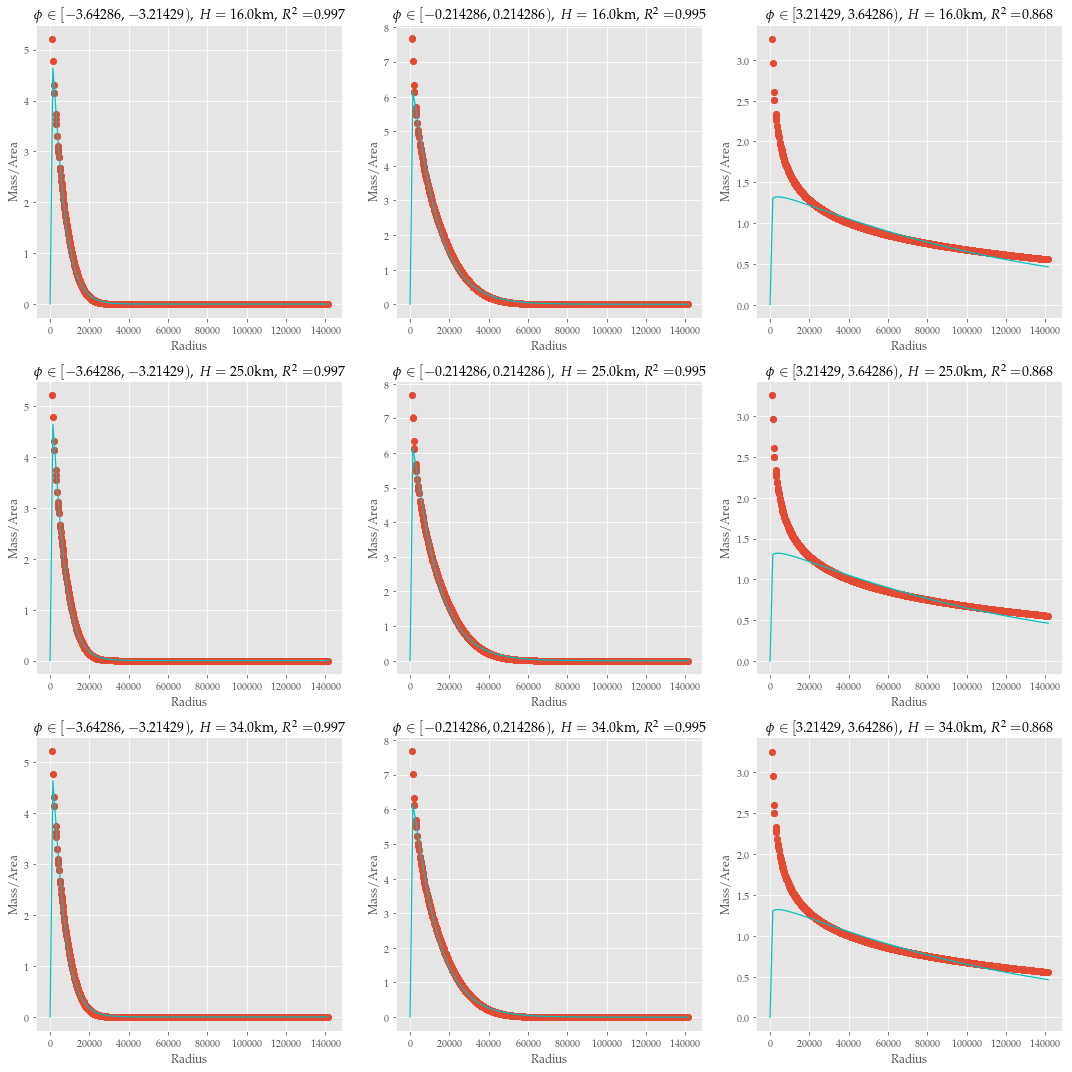

In [275]:
# drop vent

fig, axs = plt.subplots(3, 3, figsize=(
    15, 15), facecolor='w', edgecolor='k')
axs = axs.ravel()
k = 0
for i, H in enumerate(H_arr):
    for j, phi in enumerate(phi_arr):
        df = eruptions[v].df
        df = df[df['radius']!=0]
        ma = df['MassArea'].values
        wt = df[phi].values
        xx = df['radius'].values
        yy = ma * (wt / 100)
        
        x_data = xx
        y_data = yy ** (1/4)
        
        axs[k].scatter(x_data, y_data)
        axs[k].set_title(r'$\phi \in %s,\:H=%s$km' % (str(phi), disp_func(H)), fontsize=14)
        
        k0 = np.array([1, -1e-3, 0.1], dtype=np.float64)

        def gk_fun(k): return gk_sse(k, x_data, y_data)
        
        gk_popt = minimize(gk_fun, k0, method='Nelder-Mead')
        
        gk_res = coef_def(y_data, gamma_kernel(x_data, *gk_popt.x))
        print("_______Phi:" + str(phi) + " __ H:" + str(H) + "______")
        print("Gamma Kernel: " + str(gk_popt.success) + " : " + str(gk_popt.message))
        print("gk_params:" + str(gk_popt.x))
        print("gk_res:" + str(gk_res))
        
        xf = np.linspace(0, x_data.max(), 100)
        gk_yf = gamma_kernel(xf, *gk_popt.x)        
        axs[k].plot(xf, gk_yf, 'c-', lw=1.2, label="GK")
        
        axs[k].set_ylabel('Mass/Area')
        axs[k].set_xlabel(r'Radius')
        axs[k].set_title(r'$\phi \in %s,\:H=%s$km, $R^2=$%0.3f' % (str(phi), disp_func(H), gk_res), fontsize=14)
        k += 1
    plt.tight_layout()
    
plt.savefig("fit_drop_vent.png", dpi=200, format='png')
plt.show()

_______Phi:[-3.64286,-3.21429) __ H:16000______
Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
gk_params:[-2.48636236e-01 -5.72460446e-04  7.21558466e+03]
gk_res:0.9998568603956741


c:\users\nmostert\envs\spew\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in power
  This is separate from the ipykernel package so we can avoid doing imports until


_______Phi:[-0.214286,0.214286) __ H:16000______
Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
gk_params:[-5.54028480e-01 -2.67745095e-04  1.96069907e+05]
gk_res:0.9953592360143151
_______Phi:[3.21429,3.64286) __ H:16000______
Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
gk_params:[-1.21136227e+00 -6.43091233e-06  4.83670682e+05]
gk_res:0.9989830319027895


c:\users\nmostert\envs\spew\lib\site-packages\matplotlib\font_manager.py:1328: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


_______Phi:[-3.64286,-3.21429) __ H:25000______
Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
gk_params:[-2.48636236e-01 -5.72460446e-04  7.21558466e+03]
gk_res:0.9998568603956741
_______Phi:[-0.214286,0.214286) __ H:25000______
Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
gk_params:[-5.54028480e-01 -2.67745095e-04  1.96069907e+05]
gk_res:0.9953592360143151
_______Phi:[3.21429,3.64286) __ H:25000______
Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
gk_params:[-1.21136227e+00 -6.43091233e-06  4.83670682e+05]
gk_res:0.9989830319027895
_______Phi:[-3.64286,-3.21429) __ H:34000______
Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
gk_params:[-2.48636236e-01 -5.72460446e-04  7.21558466e+03]
gk_res:0.9998568603956741
_______Phi:[-0.214286,0.214286) __ H:34000______
Gamma Kernel: False : Maximum number of function evaluations has been exceeded.
gk_params:[-5.54

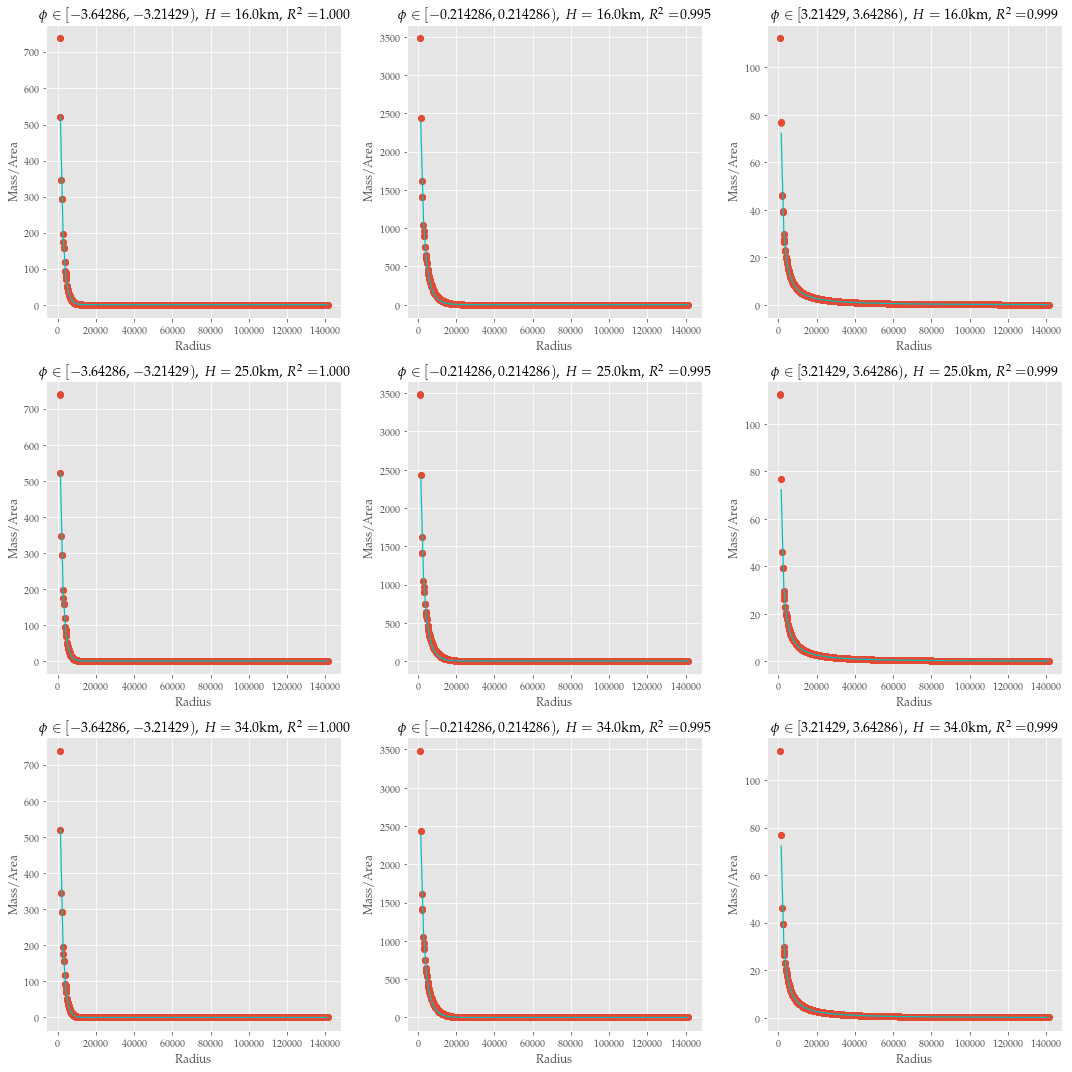

In [311]:
# drop vent

fig, axs = plt.subplots(3, 3, figsize=(
    15, 15), facecolor='w', edgecolor='k')
axs = axs.ravel()
k = 0
for i, H in enumerate(H_arr):
    for j, phi in enumerate(phi_arr):
        df = eruptions[v].df
        df = df[df['radius']!=0]
        ma = df['MassArea'].values
        wt = df[phi].values
        xx = df['radius'].values
        yy = ma * (wt / 100)
        
        x_data = xx
        y_data = yy
        
        axs[k].scatter(x_data, y_data)
        axs[k].set_title(r'$\phi \in %s,\:H=%s$km' % (str(phi), disp_func(H)), fontsize=14)
        
        k0 = np.array([1, -1e-3, 100], dtype=np.float64)

        def gk_fun(k): return gk_sse(k, x_data, y_data)
        
        gk_popt = minimize(gk_fun, k0, method='Nelder-Mead')
        
        gk_res = coef_def(y_data, gamma_kernel(x_data, *gk_popt.x))
        print("_______Phi:" + str(phi) + " __ H:" + str(H) + "______")
        print("Gamma Kernel: " + str(gk_popt.success) + " : " + str(gk_popt.message))
        print("gk_params:" + str(gk_popt.x))
        print("gk_res:" + str(gk_res))
        
        xf = np.linspace(0, x_data.max(), 100)
        gk_yf = gamma_kernel(xf, *gk_popt.x)        
        axs[k].plot(xf, gk_yf, 'c-', lw=1.2, label="GK")
        
        axs[k].set_ylabel('Mass/Area')
        axs[k].set_xlabel(r'Radius')
        axs[k].set_title(r'$\phi \in %s,\:H=%s$km, $R^2=$%0.3f' % (str(phi), disp_func(H), gk_res), fontsize=14)
        k += 1
    plt.tight_layout()
    
plt.savefig("fit_drop_vent_no_trans.png", dpi=200, format='png')
plt.show()